In [1]:
import numpy as np
import pandas as pd
import itertools

In [2]:
df=pd.read_excel('restaurants_toronto3.xlsx')

In [6]:
#df.shape

(3929, 7)

In [5]:
df=df.dropna()
df=df.reset_index(drop=True)

In [4]:
#df

,address,categories,city,name,stars,cuisine,cost
0,1170 Queen Street W,"Juice Bars & Smoothies, Food, Restaurants, Fas...",Toronto,Bolt Fresh Bar,3.0,Juice,1
1,1051 Bloor Street W,"Restaurants, Nightlife, Breakfast & Brunch, Ve...",Toronto,The Steady Cafe & Bar,3.5,Breakfast & Brunch,2
2,582 College Street,"Restaurants, Breakfast & Brunch, Bars, Modern ...",Toronto,Mad Crush Wine Bar,4.0,Breakfast & Brunch,3
3,1614 Queen Street E,"Tex-Mex, Mexican, Restaurants",Toronto,Burrito Bandidos,3.5,Mexican,1
4,5241 Dundas Street W,"Grocery, Restaurants, Steakhouses, Butcher, Food",Toronto,Medium Rare,4.0,NaN,2
5,165 East Liberty Street,"Middle Eastern, Restaurants, Salad, Breakfast ...",Toronto,Paramount Fine Foods,2.0,Middle,3
6,105 The Pond Road,"Sandwiches, Cafes, Food, Restaurants, Coffee &...",Toronto,Aroma Espresso Bar,3.5,NaN,3
7,1732 Kingston Road,"Sushi Bars, Restaurants",Toronto,Ume Fashion Sushi,4.5,Sushi,3
8,"1346 Queen Street, Unit 2","Desserts, Ice Cream & Frozen Yogurt, Food, Res...",Toronto,Not Your Mother,4.0,NaN,3
9,322 Adelaide Street W,"Soup, Restaurants, Sandwiches",Toronto,Ravi Soups,4.5,NaN,3


In [7]:
def condense_cuisine(row):
    if (row=='Sushi' or row=='Korean'):
        return 'Japan'
    if (row=='Vietnamese' ):
        return 'Thai'
    if (row=='French' or row=='Italian'):
        return 'European'
    if (row=='Greek' or row=='Middle'):
        return 'Mediterranean'
    if (row=='Baker' or row=='Juice'):
        return 'Dessert'
    if (row=='Barbeque'):
        return 'Canadian'
    if (row=='Peruvian'):
        return 'Mexican'
    else:
        return row
    return None
df['cuisine']=df['cuisine'].apply(condense_cuisine)

In [8]:
#df.groupby('cuisine').count()

,address,categories,city,name,stars,cost
cuisine,,,,,,
Breakfast & Brunch,400,400,400,400,400,400
Canadian,606,606,606,606,606,606
Chinese,368,368,368,368,368,368
Dessert,224,224,224,224,224,224
European,591,591,591,591,591,591
Indian,238,238,238,238,238,238
Japan,597,597,597,597,597,597
Mediterranean,413,413,413,413,413,413
Mexican,236,236,236,236,236,236


1.	Japan/Korean/Sushi
2.	Thai/Vietnamese
3.	chinese
4.	Mexican
5.	Indian
6.	Italian/French
7.	Greek/Mediterranean/Middle eastern
8.	canadian/Barbeque
9.	B&B,Baker,Juice
10.	Other(Peru carribean Jamaica ethopia)

In [30]:
X=df.iloc[:,[5,6]].values
X_train=X.copy()
X

array([['Dessert', 1],
       ['Breakfast & Brunch', 2],
       ['Breakfast & Brunch', 3],
       ...,
       ['Breakfast & Brunch', 3],
       ['Japan', 3],
       ['Thai', 3]], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X_train[:, 0] = labelencoder_X.fit_transform(X_train[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X_train = onehotencoder.fit_transform(X_train).toarray()
X_train

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 2.],
       [1., 0., 0., ..., 0., 0., 3.],
       ...,
       [1., 0., 0., ..., 0., 0., 3.],
       [0., 0., 0., ..., 0., 0., 3.],
       [0., 0., 0., ..., 0., 1., 3.]])

In [32]:
from sklearn.compose import ColumnTransformer
#labelencoder_X = LabelEncoder()
#X_train[:, 0] = labelencoder_X.fit_transform(X_train[:, 0])
onehotencoder = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [0])],remainder='passthrough')
X_t = onehotencoder.fit_transform(X_train)


In [ ]:
label_encoder = LabelEncoder()
X[: , 0] = label_encoder.fit_transform(X[:,0])
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [1]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X = transformer.fit_transform(X.tolist())
X = X.astype('float64')

In [31]:
X_train

array([['Dessert', 1],
       ['Breakfast & Brunch', 2],
       ['Breakfast & Brunch', 3],
       ...,
       ['Breakfast & Brunch', 3],
       ['Japan', 3],
       ['Thai', 3]], dtype=object)

In [252]:
#labelencoder_Xt = LabelEncoder()
#Xt=Xt.reshape(-1, 1)
#print(Xt[0])
#Xt[:,0] = labelencoder_X.transform(Xt[:,0])
#print(Xt)
#onehotencoder = OneHotEncoder(categorical_features = [0])
#Xt = onehotencoder.transform(Xt).toarray()


In [253]:
#Xt

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (30) found smaller than n_clusters (31). Possibly due to duplicate points in X.
  return_n_iter=True)


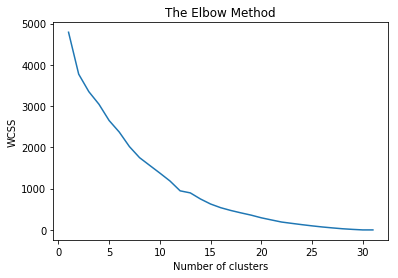

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
wcss = []
for i in range(1, 32):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,32), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset




In [14]:
kmeans = KMeans(n_clusters = 30, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train)

In [17]:
len(y_kmeans)

3929

In [199]:
X[y_kmeans == 0, 0]

array(['Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert',
       'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert',
       'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert',
       'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert',
       'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert',
       'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert',
       'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert',
       'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert',
       'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert',
       'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert',
       'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert',
       'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert',
       'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert', 'Dessert',
       'Dessert', 'Dessert', 'Dessert', 'Dessert', 

In [250]:
def plotscatter(X,y_kmeans,n):
    colors = itertools.cycle(["r", "b", "g","c","m","y","k","pink","indigo","olive","tomato","lime"])
    cmap = mpl.cm.autumn
    for i in range(0,n):
        plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, color=next(colors))
    plt.rcParams["figure.figsize"] = 16,6
    plt.title('Clusters of restaurants')
    plt.xlabel('Cuisine Type ')
    plt.ylabel('Cost($) ')
    plt.legend()
    plt.show()
    #fig_size = plt.rcParams["figure.figsize"]
    
    return

No handles with labels found to put in legend.


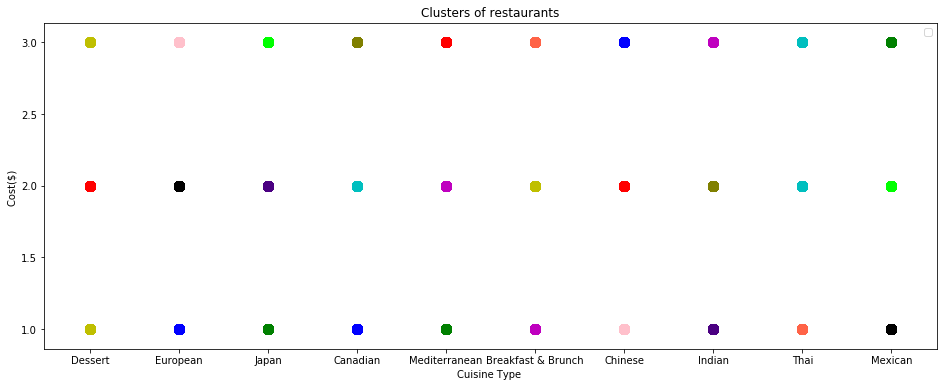

In [251]:
plotscatter(X,y_kmeans,30)

In [20]:
dfd=pd.DataFrame({"Cluster ID":y_kmeans})
dfa=pd.concat([dfd, df],axis=1, sort=False)
dfa.head()

,Cluster ID,address,categories,city,name,stars,cuisine,cost
0,17,1170 Queen Street W,"Juice Bars & Smoothies, Food, Restaurants, Fas...",Toronto,Bolt Fresh Bar,3.0,Dessert,1
1,5,1051 Bloor Street W,"Restaurants, Nightlife, Breakfast & Brunch, Ve...",Toronto,The Steady Cafe & Bar,3.5,Breakfast & Brunch,2
2,22,582 College Street,"Restaurants, Breakfast & Brunch, Bars, Modern ...",Toronto,Mad Crush Wine Bar,4.0,Breakfast & Brunch,3
3,18,1614 Queen Street E,"Tex-Mex, Mexican, Restaurants",Toronto,Burrito Bandidos,3.5,Mexican,1
4,24,165 East Liberty Street,"Middle Eastern, Restaurants, Salad, Breakfast ...",Toronto,Paramount Fine Foods,2.0,Mediterranean,3


In [21]:
dfa["Cluster ID"].unique()

array([17,  5, 22, 18, 24, 23, 19, 26, 25, 29,  4,  0,  6, 11, 15,  8,  3,
       12, 13, 10,  2,  1,  7, 14, 20, 16, 27, 21, 28,  9], dtype=int64)

In [27]:
len(kmeans.labels_)

3929

In [29]:
kmeans.inertia_

946.6046741494621

In [38]:
Xt=np.array([["Japan",2.6]])

In [39]:
Xt[:,0] = labelencoder_X.transform(Xt[:,0])
print(Xt)
#onehotencoder = OneHotEncoder(categorical_features = [0])
Xt = onehotencoder.transform(Xt).toarray()

[['6' '2.6']]


In [31]:
type(Xt)

numpy.ndarray

In [15]:
def cluster_predict(Xt):
    #Y = vectorizer.transform(list(str_input))
    prediction = kmeans.predict(Xt)
    return prediction

In [42]:
pred=cluster_predict(Xt)
pred=int(pred)
out=dfa.loc[dfa["Cluster ID"]==pred]
out.head()

,Cluster ID,address,categories,city,name,stars,cuisine,cost
5,4,1732 Kingston Road,"Sushi Bars, Restaurants",Toronto,Ume Fashion Sushi,4.5,Japan,3
7,4,2945 Lake Shore Boulevard,"Sushi Bars, Japanese, Restaurants",Toronto,Kibo Sushi House,4.0,Japan,3
23,4,586 Bloor St W,"Restaurants, Korean",Toronto,Kimchi House,4.0,Japan,2
24,4,599 Bloor Street W,"Poke, Asian Fusion, Food, Restaurants, Hawaiia...",Toronto,Big Tuna PokÃ© Bar,3.0,Japan,2
32,4,"2035 Kennedy Road, 14th Floor","Japanese, Restaurants",Toronto,Sagano,3.0,Japan,2


In [43]:
pred

4

In [46]:
random_subset = out.sample(n=5)
random_subset.head()
random_subset['name'].values

array(['Ki Modern Japanese + Bar', 'Momofuku DaishÅ�',
       'KIBO Sushi & Tapas', 'Wakame Sushi', 'Inakaya'], dtype=object)

In [16]:
from flask import Flask,render_template,url_for,request
import pandas as pd 
import pickle
import requests
from bs4 import BeautifulSoup

In [35]:
app = Flask(__name__)

@app.route('/')
def home():
    return render_template('home.html')


@app.route('/recommend',methods=['POST'])
def recommend():
    if request.method == 'POST':
        option = request.form['cuisine']
        print(option)
        cost=request.form['cost']
        print(cost)
        Xt=np.array([[option,cost]])
        Xt[:,0] = labelencoder_X.transform(Xt[:,0])
        print(Xt)
        #onehotencoder = OneHotEncoder(categorical_features = [0])
        Xt = onehotencoder.transform(Xt).toarray()
        print(Xt)
        pred=cluster_predict(Xt)
        pred=int(pred)
        out=dfa.loc[dfa["Cluster ID"]==pred]
        random_subset = out.sample(n=5)
        name=random_subset['name'].values
        print(name)
        address=random_subset['address'].values
        to_pass=[]
        for n in range(0,len(name)):
            lst=[name[n],address[n]]
            to_pass.append(lst)
       # link=random_subset["6"]
        print(to_pass)
    return render_template('Recommendation.html',myData=to_pass)

In [36]:
if __name__ == '__main__':
    #app.run(host='0.0.0.0',port=8080)
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Feb/2020 19:54:47] "GET / HTTP/1.1" 200 -


European
2


C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
[2020-02-05 19:54:52,072] ERROR in app: Exception on /recommend [POST]
Traceback (most recent call last):
  File "C:\Users\hp\Anaconda3\lib\site-packages\flask\app.py", line 2292, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\hp\Anaconda3\lib\site-packages\flask\app.py", line 1815, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\hp\Anaconda3\lib\site-packages\flask\app.py", line 1718, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\hp\Anaconda3\lib\site-packages\flask\_compat.py", line 35, in reraise
    raise value
  File "C:\Users\hp\Anaconda3\lib\site-packages\flask\app.py", line 1813, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\hp\Anaconda3\lib\site

Chinese
2


127.0.0.1 - - [05/Feb/2020 20:23:18] "GET / HTTP/1.1" 200 -
[2020-02-05 20:23:24,481] ERROR in app: Exception on /recommend [POST]
Traceback (most recent call last):
  File "C:\Users\hp\Anaconda3\lib\site-packages\flask\app.py", line 2292, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\hp\Anaconda3\lib\site-packages\flask\app.py", line 1815, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\hp\Anaconda3\lib\site-packages\flask\app.py", line 1718, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\hp\Anaconda3\lib\site-packages\flask\_compat.py", line 35, in reraise
    raise value
  File "C:\Users\hp\Anaconda3\lib\site-packages\flask\app.py", line 1813, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\hp\Anaconda3\lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-35-bdcf9c402c6b

European
2


In [51]:
random_subset.head()

,Cluster ID,0,1,2,3,4,5,6
406,31,51 Colborne Street,"Canadian (New), Modern European, Restaurants, ...",Toronto,Real Mo-Mo's,4.0,Canadian,3
403,31,1 Richmond St W,"Diners, Restaurants, Breakfast & Brunch, Canad...",Toronto,Sunset Grill,3.5,Canadian,3
285,31,758 Queen Street E,"Canadian (New), Restaurants, Bars, Lounges, Ni...",Toronto,The Comrade,4.0,Canadian,3
3903,31,600 King St West,"Pubs, Nightlife, Beer, Wine & Spirits, Gastrop...",Toronto,The Bier Markt,3.0,Canadian,3
3843,31,2232 Queen Street E,"Gastropubs, Canadian (New), Restaurants",Toronto,Outrigger,3.5,Canadian,3
